In [89]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [90]:
df = pd.read_csv('asos_reviews_clean_date.csv')

In [91]:
df.head()

,Unnamed: 0,date,review,stars,length,polarity_before_clean,lower,no_punc,no_stop,no_num,words_removed,token,pos_tags,lemmatized,joined,polarity_after_clean
0,0,2020-12-09,Cristy was amazing ...,5,225,0.580208,cristy was amazing i spoke with cristy and she...,cristy was amazing i spoke with cristy and she...,cristy amazing spoke cristy brilliant although...,cristy amazing spoke cristy brilliant although...,cristy amazing spoke cristy brilliant although...,"['cristy', 'amazing', 'spoke', 'cristy', 'bril...","[('cristy', 'JJ'), ('amazing', 'VBG'), ('spoke...","['cristy', 'amaze', 'spoke', 'cristy', 'brilli...",cristy amaze spoke cristy brilliant although c...,0.536111
1,1,2020-12-09,Unhappy customer ...,1,1694,-0.061012,unhappy customer i placed an order at the end ...,unhappy customer i placed an order at the end ...,unhappy customer placed order end november bla...,unhappy customer placed order end november bla...,unhappy placed end november black friday disco...,"['unhappy', 'placed', 'end', 'november', 'blac...","[('unhappy', 'JJ'), ('placed', 'VBD'), ('end',...","['unhappy', 'place', 'end', 'november', 'black...",unhappy place end november black friday discou...,-0.201667
2,2,2020-12-09,Still Waiting P...,2,145,-0.195000,still waiting placed an order 3rd december and...,still waiting placed an order 3rd december and...,still waiting placed order 3rd december still ...,still waiting placed order rd december still w...,still waiting placed rd december still waiting...,"['still', 'waiting', 'placed', 'rd', 'december...","[('still', 'RB'), ('waiting', 'VBG'), ('placed...","['still', 'wait', 'place', 'rd', 'december', '...",still wait place rd december still wait suppos...,-0.300000
3,3,2020-12-09,Great after sales support ...,5,94,0.900000,great after sales support great after sales su...,great after sales support great after sales su...,great sales support great sales support thank,great sales support great sales support thank,great sales support great sales support thank,"['great', 'sales', 'support', 'great', 'sales'...","[('great', 'JJ'), ('sales', 'NNS'), ('support'...","['great', 'sale', 'support', 'great', 'sale', ...",great sale support great sale support thank,0.800000
4,4,2020-12-09,Michael was very polite and helpful… ...,5,139,0.200000,michael was very polite and helpful… michael w...,michael was very polite and helpful michael wa...,michael polite helpful michael polite helpful ...,michael polite helpful michael polite helpful ...,michael polite helpful michael polite helpful ...,"['michael', 'polite', 'helpful', 'michael', 'p...","[('michael', 'NN'), ('polite', 'VBP'), ('helpf...","['michael', 'polite', 'helpful', 'michael', 'p...",michael polite helpful michael polite helpful ...,0.200000


In [92]:
df = df[['date', 'stars', 'length', 'lemmatized', 'joined']]

In [93]:
# Calculate the polarity of reviews and add a column with the result

df['polarity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [94]:
df.head()

,date,stars,length,lemmatized,joined,polarity
0,2020-12-09,5,225,"['cristy', 'amaze', 'spoke', 'cristy', 'brilli...",cristy amaze spoke cristy brilliant although c...,0.536111
1,2020-12-09,1,1694,"['unhappy', 'place', 'end', 'november', 'black...",unhappy place end november black friday discou...,-0.201667
2,2020-12-09,2,145,"['still', 'wait', 'place', 'rd', 'december', '...",still wait place rd december still wait suppos...,-0.300000
3,2020-12-09,5,94,"['great', 'sale', 'support', 'great', 'sale', ...",great sale support great sale support thank,0.800000
4,2020-12-09,5,139,"['michael', 'polite', 'helpful', 'michael', 'p...",michael polite helpful michael polite helpful ...,0.200000


In [95]:
df.dtypes

date           object
stars           int64
length          int64
lemmatized     object
joined         object
polarity      float64
dtype: object

In [96]:
# Converting date to datetime

df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

In [97]:
df.dtypes

date          datetime64[ns]
stars                  int64
length                 int64
lemmatized            object
joined                object
polarity             float64
dtype: object

In [112]:
# Creating dataframe with reviews from June since we found in Tableau that this month had the lowest 
# average polarity and we want explore what words that were commonly mentioned in this month

june_df = df[(df['date'] > '2020-06-01') & (df['date'] < '2020-06-30')]

In [103]:
june_df = june_df.reset_index(drop = True)
june_df.head()

,date,stars,length,lemmatized,joined,polarity
0,2020-06-29,5,355,"['love', 'great', 'operate', 'like', 'well', '...",love great operate like well oil machine even ...,0.327083
1,2020-06-29,1,574,"['take', 'week', 'ship', 'take', 'week', 'ship...",take week ship take week ship order express sh...,-0.075000
2,2020-06-29,1,583,"['illegal', 'order', 'jacket', 'thought', 'min...",illegal order jacket thought mind always retur...,0.087500
3,2020-06-29,1,638,"['chaos', 'spend', 's', 'company', 'recent', '...",chaos spend s company recent sent unsolicited ...,-0.072727
4,2020-06-29,1,262,"['address', 'problem', 'address', 'problem', '...",address problem address problem worst ever exp...,-0.400000


In [104]:
june_df.isnull().sum()

date          0
stars         0
length        0
lemmatized    0
joined        1
polarity      0
dtype: int64

In [105]:
june_df = june_df.dropna(subset = ['joined'])

In [106]:
june_words = ' '.join(review for review in june_df['joined'])

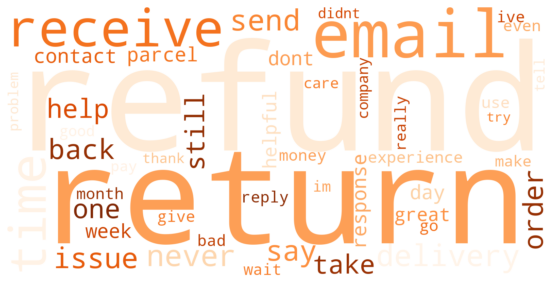

In [110]:
# Generate wordcloud

wordcloud = WordCloud(width = 1600, height = 800, random_state = 1, 
                      background_color = 'white', colormap = 'Oranges', collocations = False, 
                      min_font_size = 40, max_words = 100).generate(june_words)

# Display the image 
plt.figure( figsize=(15,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()